<a id='top'></a>

# Data Engineering of Matched FBref and TransferMarkt Data for Age Profiling Visualisation
##### Notebook to engineer matched data scraped from [TransferMarkt](https://www.transfermarkt.co.uk/) using the [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://twitter.com/FC_rstats) and [StatsBomb](https://statsbomb.com/)  data provided by [FBref](https://fbref.com/en/) using a [Python webscraper](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902).


### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 13/09/2020<br>
Notebook last updated: 30/12/2020

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook engineers previously scraped data from [TransferMarkt](https://www.transfermarkt.co.uk/) using the [FCrSTATS](https://twitter.com/FC_rstats) [Tyrone Ming](https://github.com/FCrSTATS/tyrone_mings) webscraper and manipulates this landed data as DataFrames using [pandas](http://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) for visualisation.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [4]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Flatten lists
from functools import reduce

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Currency Convert
from forex_python.converter import CurrencyRates

# APIs
from tyrone_mings import * 

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [5]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [6]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [7]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref_tm = os.path.join(base_dir, 'data', 'tm')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_fbref_tm = os.path.join(base_dir, 'data', 'fbref-tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Notebook Settings

In [8]:
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered data scraped from [TransferMarkt](https://www.transfermarkt.co.uk/) and FBref using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV and used to create Age Profile visualisation in Tableau. See example [here](https://twitter.com/NdyStats/status/1343809317107986438).

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>
Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Data Dictionaries</a>
The [TransferMarkt](https://www.transfermarkt.co.uk/) dataset has six features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `position_number`    | object     |
| `position_description`    | object     |
| `name`    | object     |
| `dob`    | object     |
| `nationality`    | object     |
| `value`    | object     |

### <a id='#section3.3'>3.3. Import CSV as pandas DataFrame</a>

In [9]:
# Import DataFrame as a CSV file
#df_fbref_tm = pd.read_csv(data_dir_fbref_tm + '/fbref_tm_big5_combined_latest.csv')
df_fbref_tm = pd.read_csv(data_dir + '/export/fbref_tm_big5_combined_latest.csv')

### <a id='#section3.4'>3.4. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [10]:
# Display the first 5 rows of the raw DataFrame, df_fbref_tm
df_fbref_tm.head()

,tm_id,Season,player,player_name,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
0,342229.0,17/18,Kylian Mbappé,kylian mbappé,18.0,22.0,19.0,1998-12-20,Paris,France,France,FRA,NaN,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,178.0,right,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,Relatives,27.0,24.0,2095.0,13.0,9.0,0.0,0.0,2.0,0.0,0.56,0.39,0.95,0.56,0.95,14.5,14.5,7.8,0.62,0.33,0.96,0.62,0.96,23.3,81.0,32.0,0.0,39.5,3.48,1.37,0.16,0.41,0.18,-1.5,-1.5,558.0,701.0,79.6,8087.0,1794.0,324.0,373.0,86.9,174.0,223.0,78.0,35.0,54.0,64.8,1.2,51.0,36.0,33.0,9.0,52.0,674.0,27.0,2.0,1.0,144.0,12.0,62.0,4.0,0.0,0.0,0.0,578.0,38.0,85.0,108.0,573.0,8.0,11.0,0.0,3.0,9.0,18.0,30.0,99.0,4.25,66.0,0.0,14.0,5.0,13.0,14.0,0.60,8.0,0.0,2.0,3.0,1.0,0.0,8.0,4.0,2.0,3.0,3.0,3.0,10.0,30.0,7.0,190.0,67.0,35.3,28.0,59.0,103.0,6.0,2.0,0.0,4.0,1.0,

In [11]:
# Display the last 5 rows of the raw DataFrame, df_fbref_tm
df_fbref_tm.tail()

,tm_id,Season,player,player_name,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
11300,NaN,18/19,Łukasz Skorupski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poland,POL,NaN,Bologna,NaN,GK,NaN,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,38.0,3420.0,56.0,1.47,173.0,121.0,0.699,11.

In [12]:
df_fbref_tm[df_fbref_tm['player'] == 'Raheem Sterling']

,tm_id,Season,player,player_name,age,age_tm,age_when_joining,dob,pob,cob,nationality,nationality_code,second_citizenship,club,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,height,foot,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,player_agent,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
25,134425.0,17/18,Raheem Sterling,raheem sterling,22.0,26.0,20.0,1994-12-08,Kingston,Jamaica,England,ENG,Jamaica,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,170.0,right,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,Colossal Sports Management,33.0,29.0,2587.0,18.0,11.0,1.0,1.0,4.0,2.0,0.63,0.38,1.01,0.59,0.97,17.2,16.2,6.4,0.60,0.22,0.82,0.56,0.79,28.7,85.0,33.0,0.0,38.8,2.96,1.15,0.20,0.52,0.19,0.8,0.8,999.0,1205.0,82.9,13467.0,2885.0,618.0,703.0,87.9,313.0,371.0,84.4,29.0,50.0,58.0,4.6,53.0,32.0,60.0,6.0,88.0,1188.0,17.0,1.0,4.0,265.0,11.0,47.0,5.0,1.0,0.0,0.0,1036.0,67.0,102.0,171.0,994.0,24.0,6.0,7.0,0.0,11.0,26.0,60.0,134.0,4.65,94.0,1.0,16.0,5.0,18.0,27.0,0.94,20.0,0.0,1.0,0.0,6.0,0.0,22.0,17.0,8.0,8.0,6.0,5.0,14.0,35.7,9.0,300.0,99.0

In [13]:
# Print the shape of the raw DataFrame, df_fbref_tm
print(df_fbref_tm.shape)

(11305, 218)


In [14]:
# Print the column names of the raw DataFrame, df_fbref_tm
print(df_fbref_tm.columns)

Index(['tm_id', 'Season', 'player', 'player_name', 'age', 'age_tm',
       'age_when_joining', 'dob', 'pob', 'cob',
       ...
       'passes_length_avg_gk', 'goal_kicks', 'pct_goal_kicks_launched',
       'goal_kick_length_avg', 'crosses_gk', 'crosses_stopped_gk',
       'crosses_stopped_pct_gk', 'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 'avg_distance_def_actions_gk'],
      dtype='object', length=218)


The dataset has thirteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [15]:
# Data types of the features of the raw DataFrame, df_fbref_tm
df_fbref_tm.dtypes

tm_id                                    float64
Season                                    object
player                                    object
player_name                               object
age                                      float64
                                          ...   
crosses_stopped_gk                       float64
crosses_stopped_pct_gk                   float64
def_actions_outside_pen_area_gk          float64
def_actions_outside_pen_area_per90_gk    float64
avg_distance_def_actions_gk              float64
Length: 218, dtype: object

All thirteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [16]:
# Info for the raw DataFrame, df_fbref_tm
df_fbref_tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Columns: 218 entries, tm_id to avg_distance_def_actions_gk
dtypes: float64(195), object(23)
memory usage: 18.8+ MB


In [17]:
# Description of the raw DataFrame, df_fbref_tm, showing some summary statistics for each numberical column in the DataFrame
df_fbref_tm.describe()

,tm_id,age,age_tm,age_when_joining,height,market_value_euros,market_value_pounds,years_since_joining,years_until_contract_expiry,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
count,8700.000000,8700.000000,8700.000000,8700.000000,8699.000000,8.700000e+03,8.700000e+03,8700.000000,8558.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.00000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.00000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.00000

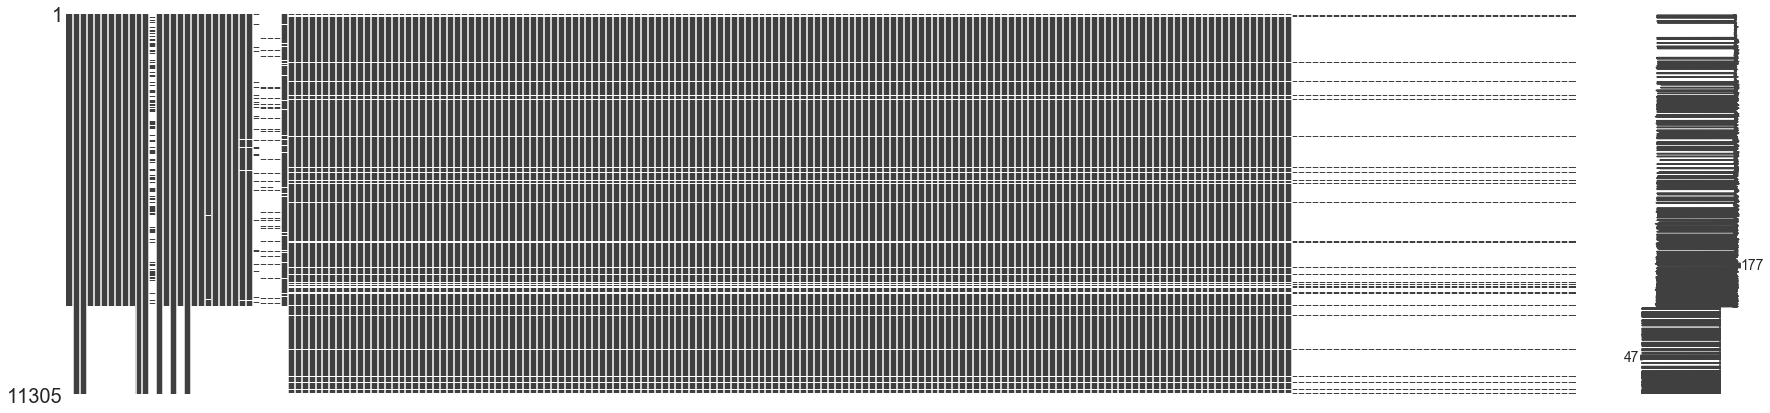

In [18]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_tm
msno.matrix(df_fbref_tm, figsize = (30, 7))

In [19]:
# Counts of missing values
tm_bio_null_value_stats = df_fbref_tm.isnull().sum(axis=0)
tm_bio_null_value_stats[tm_bio_null_value_stats != 0]

tm_id                                     2605
player_name                               2605
age                                       2605
age_tm                                    2605
age_when_joining                          2605
                                         ...  
crosses_stopped_gk                       10536
crosses_stopped_pct_gk                   10536
def_actions_outside_pen_area_gk          10536
def_actions_outside_pen_area_per90_gk    10536
avg_distance_def_actions_gk              10536
Length: 213, dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.2'>4.2. Select Columns of Interest</a>

In [35]:
# Select columns of interest
cols = ['player',
        'Season',
        'age',
        'age_tm',
        'age_when_joining',
        'dob',
        'cob',
        'nationality',
        'club',
        'position_code',
        'position_fbref',
        'position_TM',
        'position_grouped',
        'outfielder_goalkeeper',
        'market_value_euros',
        'market_value_pounds',
        'joined',
        'years_since_joining',
        'contract_expires',
        'years_until_contract_expiry',
        'contract_option',
        'on_loan_from',
        'on_loan_from_country',
        'loan_contract_expiry',
        'games',
        'games_starts',
        'minutes',
        'goals',
        'assists']

df_fbref_tm_select = df_fbref_tm[cols]

In [37]:
df_fbref_tm_select.head()

,player,Season,age,age_tm,age_when_joining,dob,cob,nationality,club,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,goals,assists
0,Kylian Mbappé,17/18,18.0,22.0,19.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,27.0,24.0,2095.0,13.0,9.0
1,Kylian Mbappé,17/18,18.0,22.0,19.0,1998-12-20,France,France,Monaco,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,1.0,1.0,74.0,0.0,0.0
2,Kylian Mbappé,18/19,19.0,22.0,19.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,29.0,24.0,2343.0,33.0,7.0
3,Kylian Mbappé,19/20,20.0,22.0,19.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,18.0,5.0
4,Kylian Mbappé,20/21,22.0,22.0,19.0,1998-12-20,France,France,Paris S-G,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,12.0,4.0


### <a id='#section4.3'>4.3. Pivot Dates</a>

In [41]:
df_fbref_tm_melt = df_fbref_tm_select.melt(id_vars=['player',
                                                    'Season',
                                                    'age',
                                                    'dob',
                                                    'cob',
                                                    'nationality',
                                                    'club',
                                                    'position_code',
                                                    'position_fbref',
                                                    'position_TM',
                                                    'position_grouped',
                                                    'outfielder_goalkeeper',
                                                    'market_value_euros',
                                                    'market_value_pounds',
                                                    'joined',
                                                    'years_since_joining',
                                                    'contract_expires',
                                                    'years_until_contract_expiry',
                                                    'contract_option',
                                                    'on_loan_from',
                                                    'on_loan_from_country',
                                                    'loan_contract_expiry',
                                                    'games',
                                                    'games_starts',
                                                    'minutes',
                                                    'goals',
                                                    'assists'],
                                            var_name='age_type', 
                                            value_name='age')

df_fbref_tm_melt = df_fbref_tm_melt.sort_values(['market_value_pounds', 'player', 'Season', 'club'], ascending=[False, True, True, True])

In [43]:
df_fbref_tm_melt.head(15)

,player,Season,age,dob,cob,nationality,club,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,goals,assists,age_type,age
1,Kylian Mbappé,17/18,22.0,1998-12-20,France,France,Monaco,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,1.0,1.0,74.0,0.0,0.0,age_tm,22.0
11306,Kylian Mbappé,17/18,19.0,1998-12-20,France,France,Monaco,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,1.0,1.0,74.0,0.0,0.0,age_when_joining,19.0
0,Kylian Mbappé,17/18,22.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,27.0,24.0,2095.0,13.0,9.0,age_tm,22.0
11305,Kylian Mbappé,17/18,19.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,27.0,24.0,2095.0,13.0,9.0,age_when_joining,19.0
2,Kylian Mbappé,18/19,22.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,29.0,24.0,2343.0,33.0,7.0,age_tm,22.0
11307,Kylian Mbappé,18/19,19.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,29.0,24.0,2343.0,33.0,7.0,age_when_joining,19.0
3,Kylian Mbappé,19/20,22.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,18.0,5.0,age_tm,22.0
11308,Kylian Mbappé,19/20,19.0,1998-12-20,France,France,Paris S-G,ST,FW,attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,20.0,17.0,1513.0,18.0,5.0,age_when_joining,19.0
4,Kylian Mbappé,20/21,22.0,1998-12-20,France,France,Paris S-G,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,12.0,4.0,age_tm,22.0
11309,Kylian Mbappé,20/21,19.0,1998-12-20,France,France,Paris S-G,ST,"FW,MF",attack - Centre-Forward,Forward,Outfielder,180000000.0,160200000.0,2018-07-01,2.0,2022-06-30,1.0,NaN,NaN,NaN,NaN,13.0,9.0,815.0,12.0,4.0,age_when_joining,19.0


### <a id='#section4.4'>4.4. Exporting the Engineered DataFrames</a>

In [44]:
# Export DataFrame as a CSV file

## Export a copy to the 'archive' subfolder of the TM folder, including the date
df_fbref_tm_melt.to_csv(data_dir_fbref_tm + f'/archive/fbref_tm_big5_age_profile_last_updated_{today}.csv', index=None, header=True)

## Export another copy to the TM folder called 'latest' (can be overwritten)
df_fbref_tm_melt.to_csv(data_dir_fbref_tm + '/fbref_tm_big5_age_profile_latest.csv', index=None, header=True)

## Export a copy to the Export folder (can be overwritten)
df_fbref_tm_melt.to_csv(data_dir + '/export/fbref_tm_big5_age_profile_latest.csv', index=None, header=True)

Now we have created three pandas DataFrames and wrangled the data to meet our needs, we'll next conduct and [Exploratory Data Analysis ](#section5).

## <a id='#section5'>5. Exploratory Data Analysis</a>
...

In [45]:
df_fbref_tm_melt[df_fbref_tm_melt['player'] == 'Raheem Sterling']

,player,Season,age,dob,cob,nationality,club,position_code,position_fbref,position_TM,position_grouped,outfielder_goalkeeper,market_value_euros,market_value_pounds,joined,years_since_joining,contract_expires,years_until_contract_expiry,contract_option,on_loan_from,on_loan_from_country,loan_contract_expiry,games,games_starts,minutes,goals,assists,age_type,age
25,Raheem Sterling,17/18,26.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,29.0,2587.0,18.0,11.0,age_tm,26.0
11330,Raheem Sterling,17/18,20.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,29.0,2587.0,18.0,11.0,age_when_joining,20.0
26,Raheem Sterling,18/19,26.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,34.0,31.0,2771.0,17.0,9.0,age_tm,26.0
11331,Raheem Sterling,18/19,20.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,34.0,31.0,2771.0,17.0,9.0,age_when_joining,20.0
27,Raheem Sterling,19/20,26.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,30.0,2651.0,20.0,1.0,age_tm,26.0
11332,Raheem Sterling,19/20,20.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,33.0,30.0,2651.0,20.0,1.0,age_when_joining,20.0
28,Raheem Sterling,20/21,26.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,999.0,4.0,2.0,age_tm,26.0
11333,Raheem Sterling,20/21,20.0,1994-12-08,Jamaica,England,Manchester City,LW,FW,attack - Left Winger,Forward,Outfielder,110000000.0,97900000.0,2015-07-14,5.0,2023-06-30,2.0,NaN,NaN,NaN,NaN,12.0,11.0,999.0,4.0,2.0,age_when_joining,20.0


## <a id='#section6'>6. Summary</a>
This notebook scrapes data for player valuations using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) from [TransferMarkt](https://www.transfermarkt.co.uk/) using [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames and [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) for webscraping.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

#### Data and Web Scraping
*    https://twitter.com/NdyStats/status/1343809317107986438
*    [tyrone_mings GitHub repository](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://github.com/FCrSTATS)
*    [Python Package Index (PyPI) tyrone-mings library](https://pypi.org/project/tyrone-mings/)
*    [Beyond crowd judgments: Data-driven estimation of market value in association football](https://www.sciencedirect.com/science/article/pii/S0377221717304332) by Oliver Müllera, Alexander Simons, and Markus Weinmann.
*    [06/04/2020: BBC - Premier League squads 'drop £1.6bn in value'](https://www.bbc.co.uk/sport/football/52221463).

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)